# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   https://www.kaggle.com/datasets/blastchar/telco-customer-churn
   Dataset mengenai prediksi perilaku pengguna terhadap sebuah perusahaan apakah berlangganan atau tidak


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [201]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import joblib
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [202]:
#import dataset
df = pd.read_csv('../Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [203]:
#cek dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [204]:
# cek missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [205]:
# cek duplicate data
df.duplicated().sum()

np.int64(0)

In [206]:
# describe all dataset
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<Axes: xlabel='Churn'>

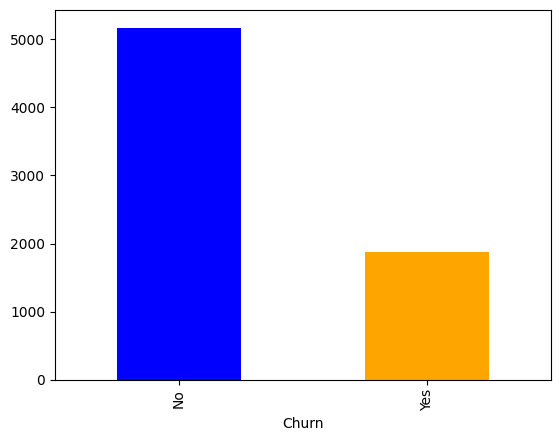

In [207]:
# Cek persebaran churn
df['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])

<Axes: title={'center': 'Persebaran Contract'}, xlabel='Contract'>

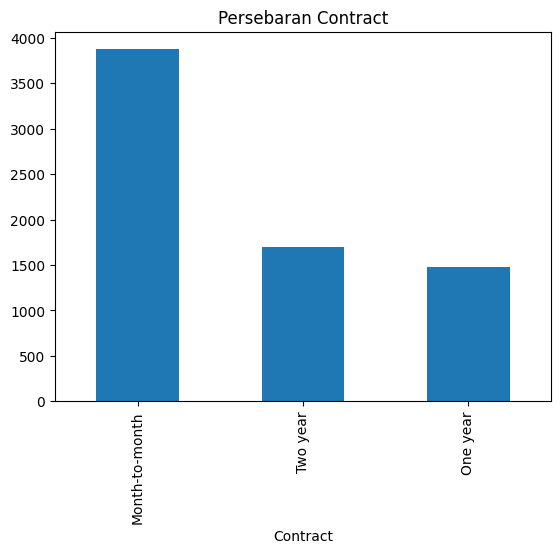

In [208]:
# cek persebaran contract
df['Contract'].value_counts().plot(kind='bar', title='Persebaran Contract')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

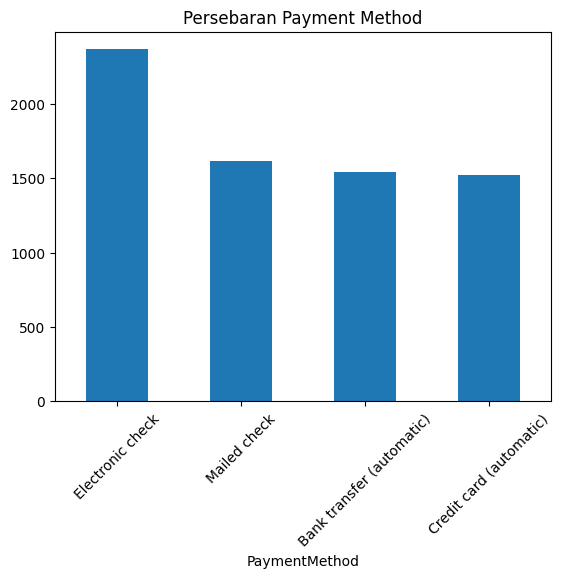

In [209]:
#Cek persebaran payment method
df['PaymentMethod'].value_counts().plot(kind='bar', title='Persebaran Payment Method')
plt.xticks(rotation=45)

<Axes: title={'center': 'Persebaran Monthly Charges'}, ylabel='Frequency'>

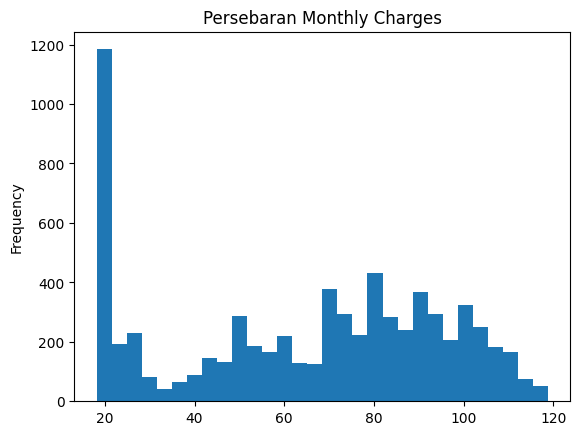

In [210]:
# Check monthly charges
df['MonthlyCharges'].plot(kind='hist', bins=30, title='Persebaran Monthly Charges')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

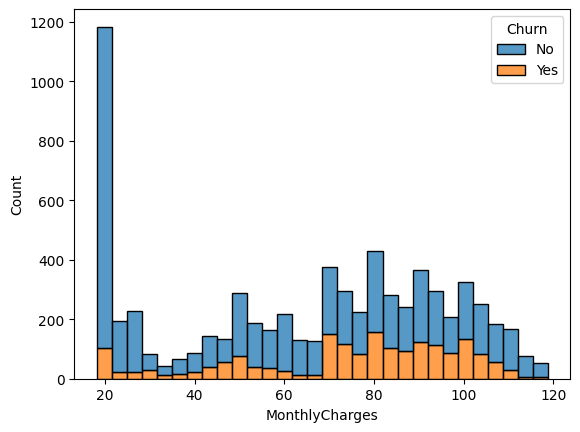

In [211]:
# cek distribusi antara churn dan monthly charges plot histogram
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [212]:
df = pd.read_csv('../Customer-Churn.csv')

In [213]:
# Drop data yang tidak diperlukan
df.drop(columns=['customerID'], inplace=True)

In [214]:
# Mengubaha tipe data totalCharges menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [215]:
# Imputasi missing value pada kolom numerik dengan median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = imputer.fit_transform(df[num_cols])

In [216]:
#Mengambil kolom numerik dan normalisasi
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [217]:
# Mengambil kolom kategorikal dan ubah menjadi numerik menggunakan one-hot encoding

categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Buat dataframe kosong untuk menampung hasil encoding
encoded_dfs = []

for col in categorical_cols:
        transformed = encoder.fit_transform(df[[col]])
        encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{cat}" for cat in encoder.categories_[0]])
        encoded_dfs.append(encoded_df)

# Gabungkan semua hasil encoding + kolom non-kategorikal
df_encoded = pd.concat([df.drop(columns=categorical_cols), *encoded_dfs], axis=1)


In [218]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   float64
 5   gender_Male                              7043 non-null   float64
 6   Partner_No                               7043 non-null   float64
 7   Partner_Yes                              7043 non-null   float64
 8   Dependents_No                            7043 non-null   float64
 9   Dependents_Yes                           7043 non-null   float64
 10  PhoneService_No                          7043 no

In [219]:
# split data menjadi fitur dan target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# split data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menggunakan automate

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

def preprocess_data(data, target_column, save_path, file_path, unnecessary_cols):
    # Konversi TotalCharges
    data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")\

    # Buang kolom tidak perlu
    data = data.drop(columns=unnecessary_cols, errors='ignore')

    # Pisah X, y
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Kolom numerik & kategorikal
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Simpan header awal
    pd.DataFrame(columns=X.columns).to_csv(file_path, index=False)

    # Pipeline numerik
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])

    # Pipeline kategorik
    categorical_transformer = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Gabung preprocessor
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Fit-transform
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Simpan pipeline
    dump(preprocessor, save_path)

    # Simpan nama kolom hasil transformasi
    encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
    encoded_cols = encoder.get_feature_names_out(categorical_features)
    full_cols = numeric_features + encoded_cols.tolist()
    pd.DataFrame(columns=full_cols).to_csv("encoded_columns.csv", index=False)

    return X_train, X_test, y_train, y_test, preprocessor


In [221]:
data = pd.read_csv('../Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(
    data=df,
    target_column='Churn',
    save_path='preprocessor.pkl',
    file_path='kolom.csv',
    unnecessary_cols='customerID'
)


In [223]:
from joblib import dump, load
def inference(new_data, load_path):
    # Memuat pipeline preprocessing
    preprocessor = load(load_path)
    print(f"Pipeline preprocessing dimuat dari: {load_path}")
 
    # Transformasi data baru
    transformed_data = preprocessor.transform(new_data)
    return transformed_data

In [224]:
# Jalankan preprocessing
pipeline_path = 'preprocessor.pkl'
col = pd.read_csv('kolom.csv')
# Daftar data
new_data = ['Female',0,'Yes','No',1,'No','No phone service','DSL','No','Yes','No','No','No','No','Month-to-month','Yes','Electronic check',29.85,29.85]
 
# Mengubah menjadi numpy.ndarray
new_data = np.array(new_data)
 
new_data = pd.DataFrame([new_data], columns=col.columns)
# Lakukan inference
transformed_data = inference(new_data, pipeline_path)


# Output hasil preprocessing dan inference
print("Data setelah preprocessing (training):")
print(new_data)
print("\nData baru setelah transformasi:")
print(transformed_data)

Pipeline preprocessing dimuat dari: preprocessor.pkl
Data setelah preprocessing (training):
   gender SeniorCitizen Partner Dependents tenure PhoneService  \
0  Female             0     Yes         No      1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod MonthlyCharges TotalCharges  
0              Yes  Electronic check          29.85        29.85  

Data baru setelah transformasi:
[[ 0.          1.         29.89461883 29.85        1.          0.
   0.          1.          1.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          1.          0